# BMI 500 (Better) Data Treatment
Alireza Rafiei - Fall 2022 - HW4

#### Old Faithful is a geyser in Yellowstone National Park, Wyoming, United States. It erupts at predictable intervals. Over one million eruptions have been recorded. Now, we want to collect, organize, and clean this dataset, make a “bad” plot of the data and a “good” plot of the data and interpret the results.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [2]:
# Retrieving the data from the internet
URL = "https://reynalab.org/teaching/bmi500_fall2022/geyser.csv"
RawData = requests.get(URL)
open("geyser.csv", "wb").write(RawData.content)

3521

#### Collecting, organizing, and cleaning the dataset

In [3]:
# As we don't know what exactly happened on the lines with three column of data, we skip them.
# Reading the data into a DataFrame and skipping the description part.
df = pd.read_csv("geyser.csv", sep=",", skiprows=range(30), on_bad_lines='skip')
df.head(20)


,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
5,2.883,55
6,4.700,88
7,3.600,85
8,1.950,51
9,4.350,85


In [4]:
# Being sure all the information is a correct number
df.dtypes

eruptions    object
waiting      object
dtype: object

So, why the type of both columns are object instead of fload?<br>
What and where is the problem?

In [5]:
# Finding the origin of the problem
for i in range(len(df)):
    for j in range(2):
        try:
            float(df.iloc[i][j])
        except: 
            print(df.iloc[i][j])
            continue

1 800
l.667
6O


Now we realized that l instead of 1, o instead of 0, and extra spaces are the typos in the data

In [6]:
# Fixing the typos using a fuction
def Fixer(DataFrame):
    for i in range(len(df)):
        for j in range(2):
            try: 
                new = DataFrame.iloc[i][j].replace("l", "1")
                new = new.replace("I", "1")
                new = new.replace("O", "0")
                new = new.replace("o", "0")
                new = new.replace(" ", "")
                DataFrame.iloc[i][j] = new
            except:
                None
    return DataFrame

In [7]:
# Removing  possible null and NaN values using a fuction
import math
def Null_NaN (DataFrame):
    for i in range(len(DataFrame)):
        for j in range(2):
            if (DataFrame.iloc[i][j] is None) or (math.isnan(DataFrame.iloc[i][j])) or (DataFrame.iloc[i][j] <= 0):
                print(1)
                DataFrame = DataFrame.drop([i])
    return DataFrame

In [8]:
# Checking the defined funcions - types of each colunm should be numerical
Fixer(df)
df= df.apply(pd.to_numeric, errors="coerce")
Null_NaN(df)
df.dtypes

eruptions    float64
waiting        int64
dtype: object

#### Let's draw the distribution of the columns!

<AxesSubplot:xlabel='waiting'>

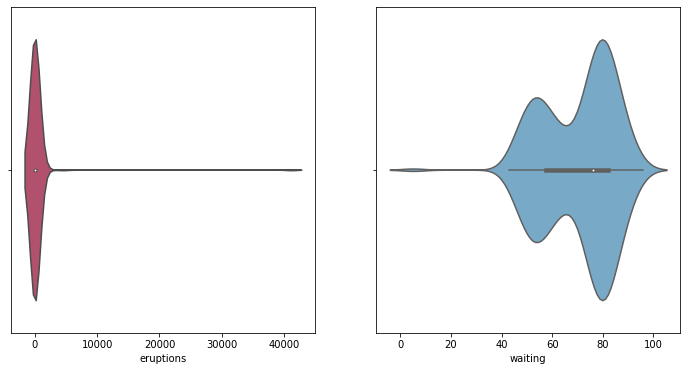

In [9]:
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax1 = axes[0]
ax2 = axes[1]
sns.violinplot(ax=ax1, data=df, x="eruptions",palette="flare")
sns.violinplot(ax=ax2, data=df, x="waiting", palette="Blues")

In [10]:
# We need to remove negative values as well
df = df[(df.eruptions >= 0) | (df.waiting >= 0)]

Let's dive into some statistics!

In [11]:
df.describe()

,eruptions,waiting
count,272.000000,272.000000
mean,177.636132,70.566176
std,2506.613861,14.174559
min,1.600000,5.000000
25%,2.145750,57.750000
50%,4.000000,76.000000
75%,4.467000,82.000000
max,41083.000000,96.000000


It looks as tough are dataset has outliers that should be removed. <br>
So, I remove outliers with considering the z-score.
For more information: https://www.geeksforgeeks.org/z-score-in-statistics/

In [12]:
import scipy.stats as stats
z = df.apply(stats.zscore)

In [13]:
# Setting 1.38 as the cleaning outlier threshold
df_processed = df
for i in range(len(df)):
    for j in range(2): 
        if (z.iloc[i][j] > 1.38) or (z.iloc[i][j] < -1.38):
            df_processed = df_processed.drop([i])

In [14]:
z.describe()

,eruptions,waiting
count,2.720000e+02,2.720000e+02
mean,-1.219409e-17,2.380653e-16
std,1.001843e+00,1.001843e+00
min,-7.035811e-02,-4.634150e+00
25%,-7.013999e-02,-9.058343e-01
50%,-6.939888e-02,3.840571e-01
75%,-6.921223e-02,8.081310e-01
max,1.634905e+01,1.797637e+00


<AxesSubplot:xlabel='waiting'>

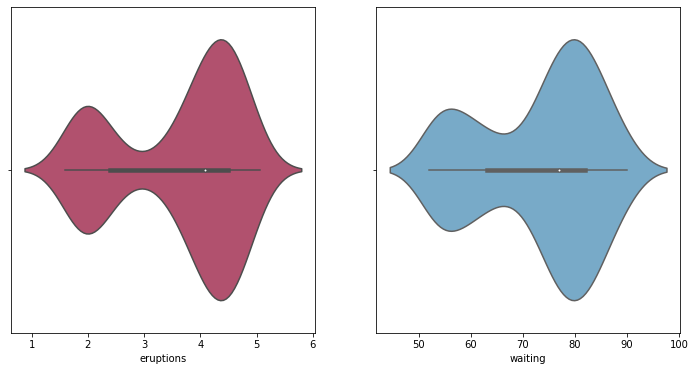

In [15]:
# Drawing the distributions after processing the data
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax1 = axes[0]
ax2 = axes[1]
sns.violinplot(ax=ax1, data=df_processed, x="eruptions",palette="flare")
sns.violinplot(ax=ax2, data=df_processed, x="waiting", palette="Blues")

In [16]:
# Statistics of our data after organization and cleaning
df_processed.describe()

,eruptions,waiting
count,232.000000,232.000000
mean,3.644435,73.211207
std,1.079049,11.293919
min,1.600000,52.000000
25%,2.395750,63.000000
50%,4.083000,77.000000
75%,4.500000,82.000000
max,5.067000,90.000000


#### Making a “bad” plot of the data and a “good” plot of the data.

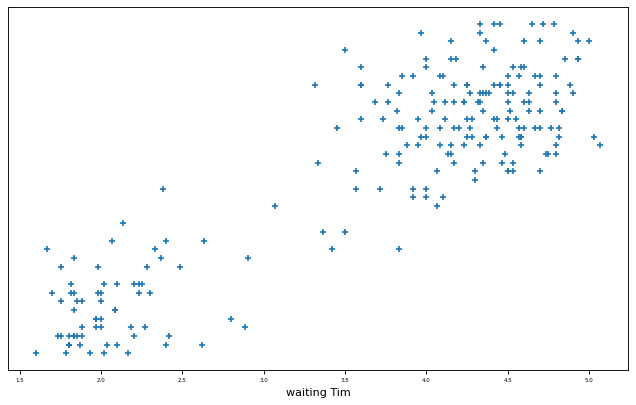

In [17]:
# Making a bad plot
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(df_processed.eruptions, df_processed.waiting, marker= "+")
plt.xlabel('waiting Tim', fontsize=10)
plt.xticks(fontsize=5)
plt.tick_params(axis='y', which='both', left=False, labelleft=False)
plt.savefig("BadPlot.png")

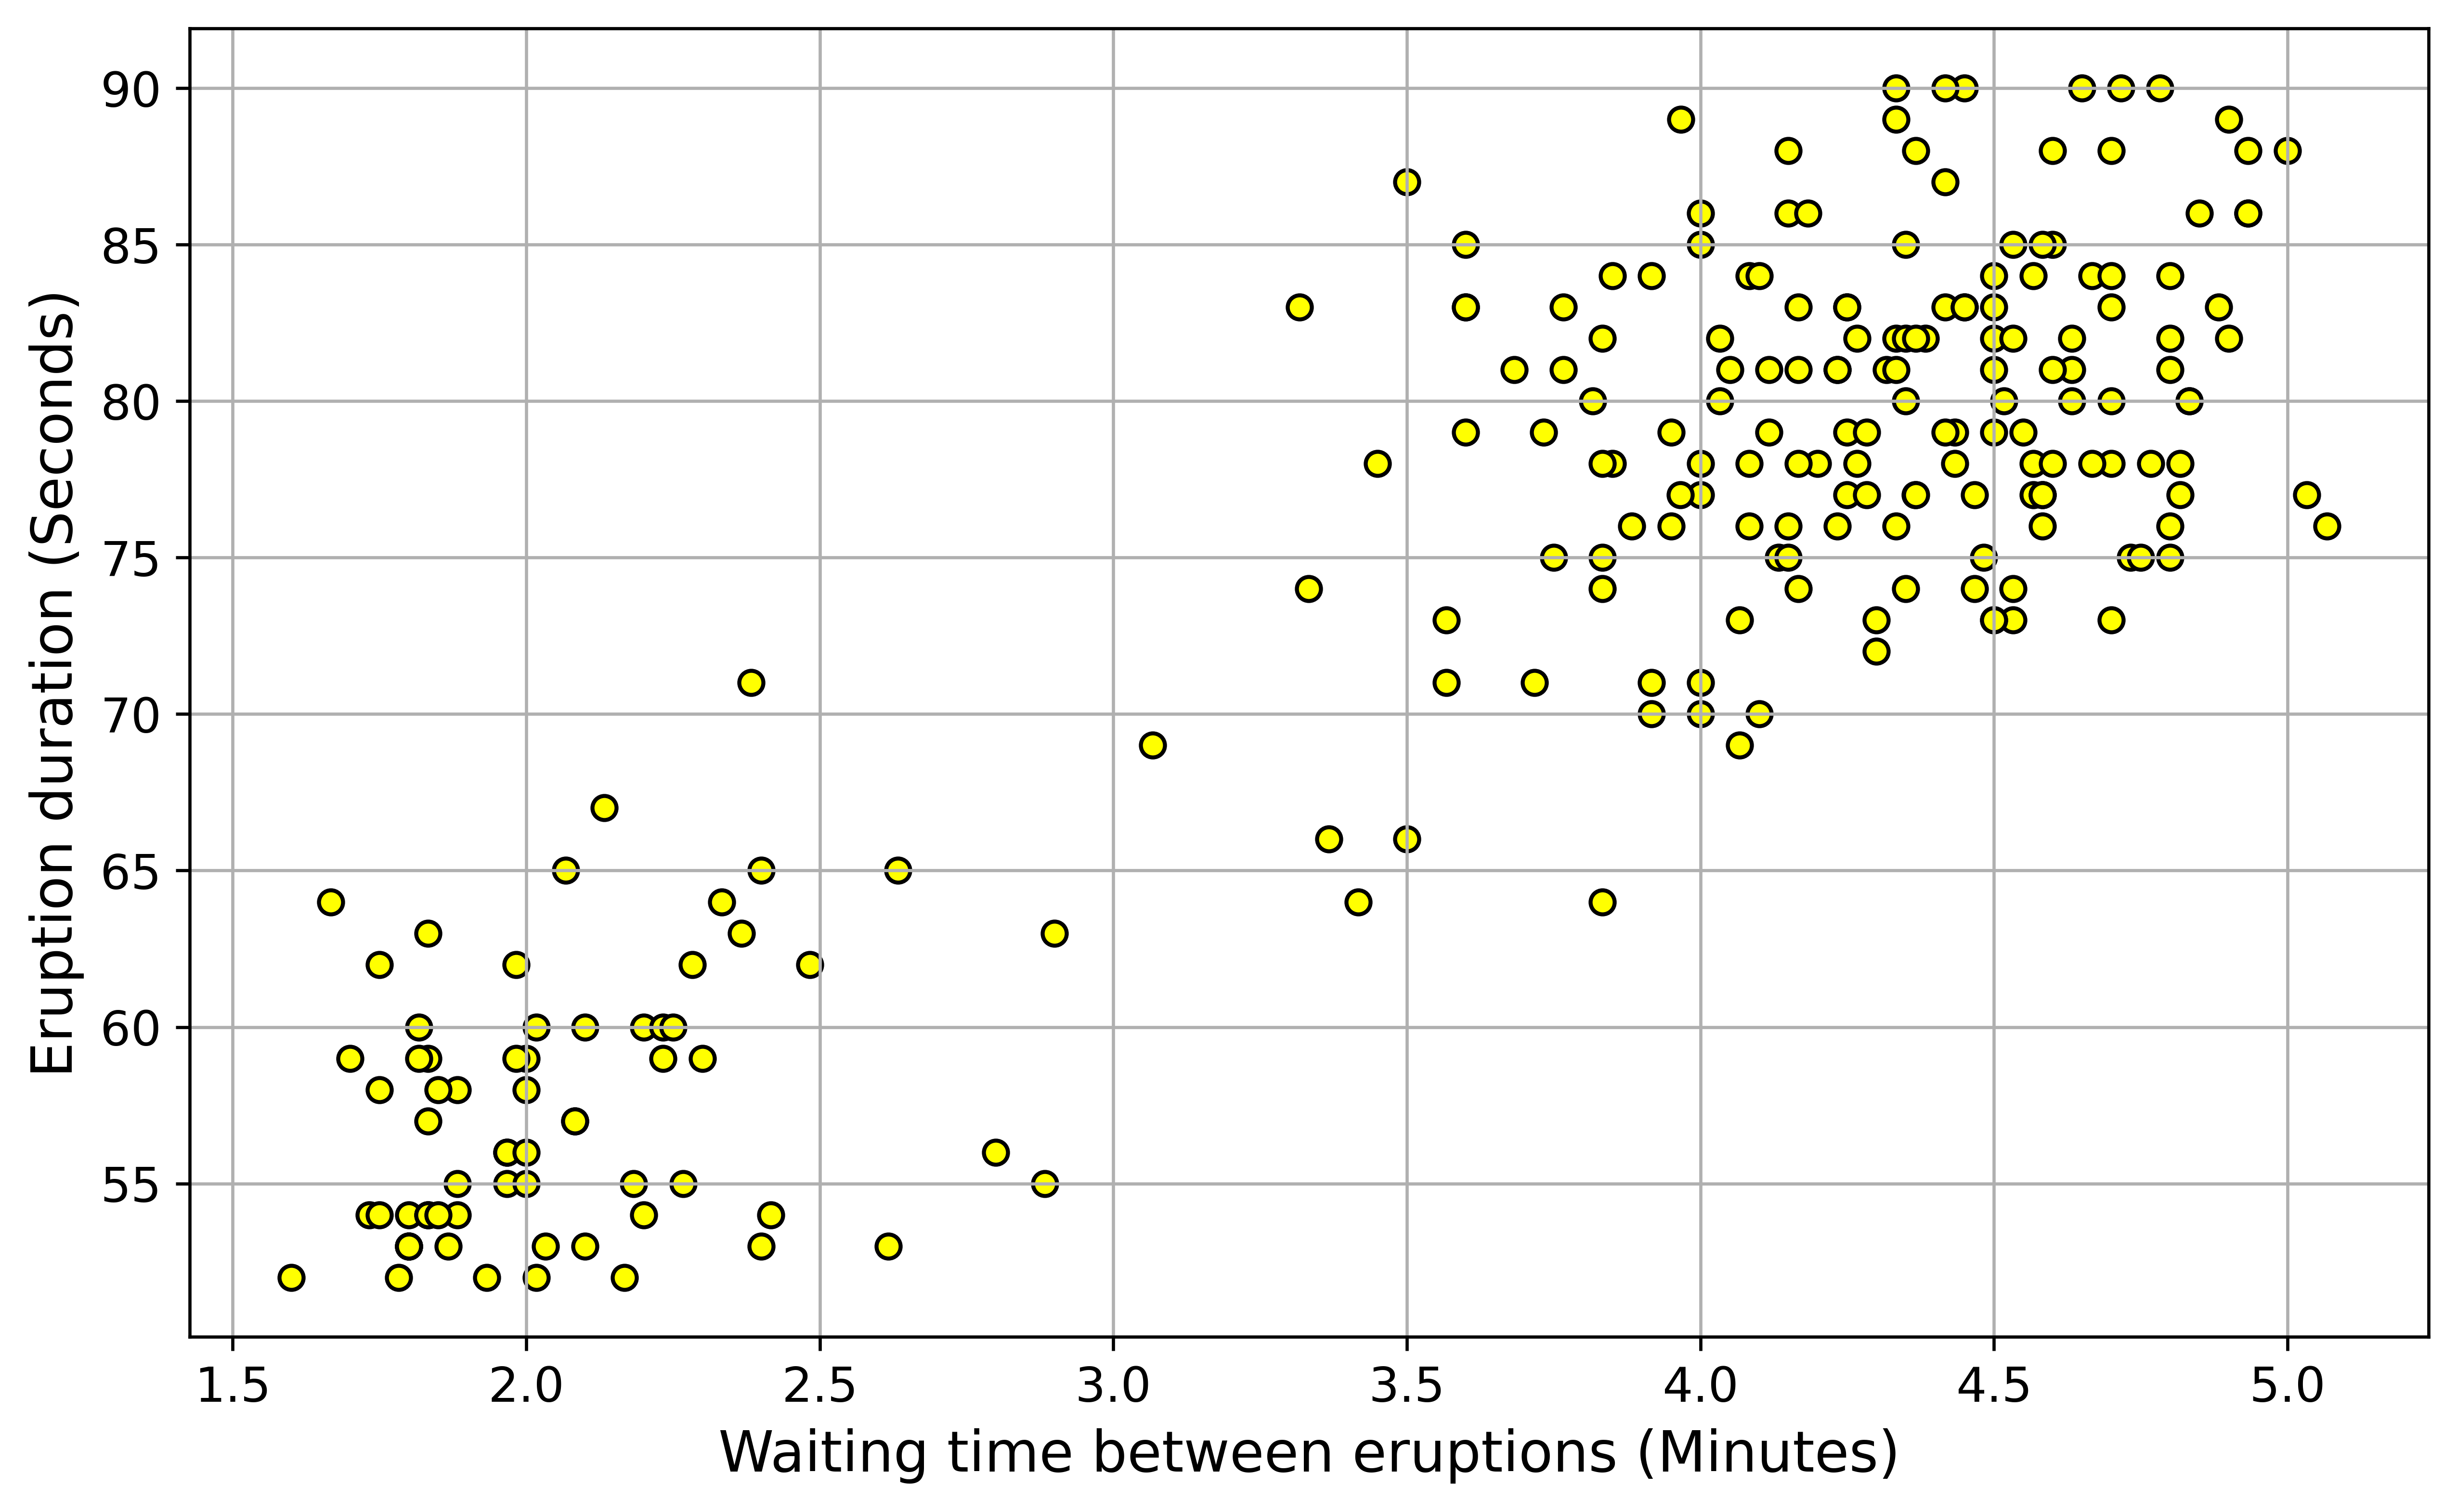

In [18]:
# Making a good plot
plt.figure(figsize=(10, 6), dpi=600)
plt.scatter(df_processed.eruptions, df_processed.waiting, edgecolors = 'k', c = "yellow")
plt.xlabel('Waiting time between eruptions (Minutes)', fontsize=14)
plt.ylabel('Eruption duration (Seconds)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.savefig("GoodPlot.png")

#### Evaluating the relationship in the data

In [19]:
# Importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [20]:
# Spliting data to test and train data
X = df_processed.waiting.to_numpy().reshape(-1, 1)
y = df_processed.eruptions.to_numpy().reshape(-1, 1).ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3, shuffle=True)

In [21]:
# Training a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_predT = model.predict(X_train)
print(model.intercept_)
print(model.coef_)

-2.5064047575094714
[0.08388779]


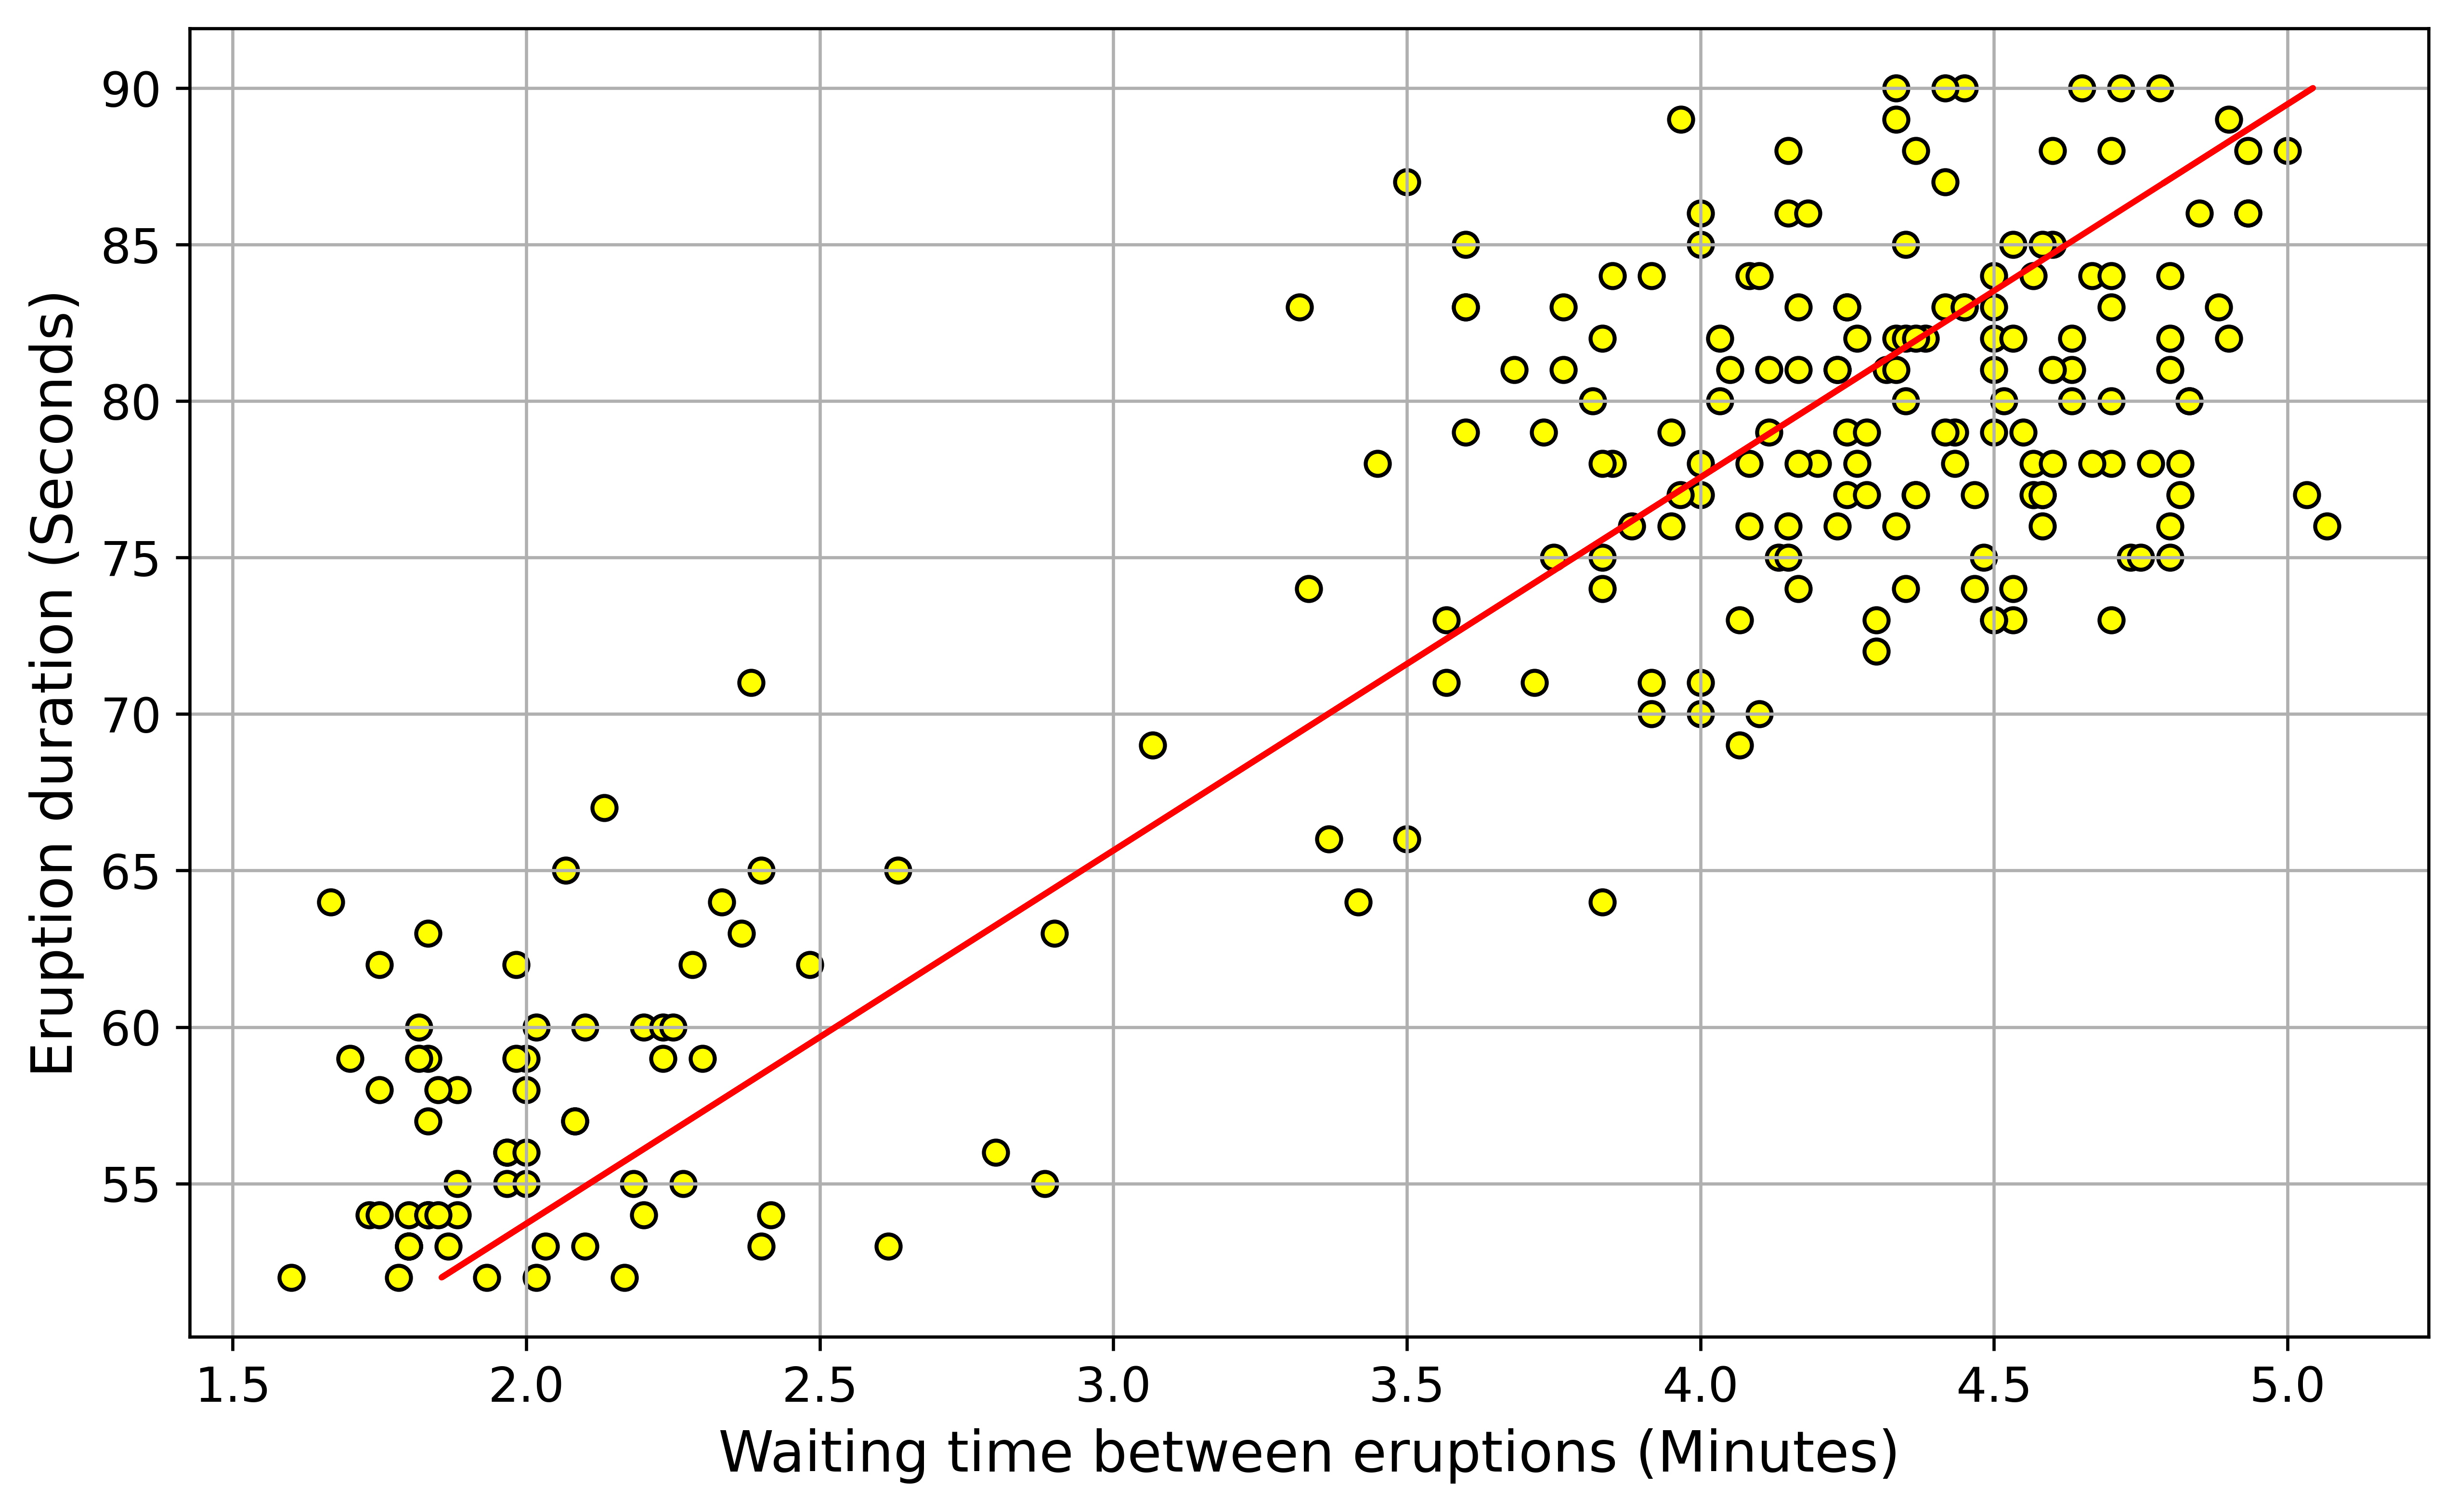

In [22]:
plt.figure(figsize=(10, 6), dpi=600)
plt.scatter(df_processed.eruptions, df_processed.waiting, edgecolors = 'k', c = "yellow")
plt.plot(y_predT, X_train, "r-")
plt.xlabel('Waiting time between eruptions (Minutes)', fontsize=14)
plt.ylabel('Eruption duration (Seconds)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.savefig("LinearRegression.png")

In [23]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
print("MAE test is {}".format(metrics.mean_absolute_error(y_test,y_pred_test)))
print("MSE test is {}".format(metrics.mean_squared_error(y_test,y_pred_test)))
print("RMSE test is {}".format(np.sqrt(metrics.mean_absolute_error(y_test,y_pred_test))))
print("R2 test is {}\n".format(metrics.r2_score(y_test,y_pred_test))) 

print("MAE train is {}".format(metrics.mean_absolute_error(y_train,y_pred_train)))
print("MSE train is {}".format(metrics.mean_squared_error(y_train,y_pred_train)))
print("RMSE train is {}".format(np.sqrt(metrics.mean_absolute_error(y_train,y_pred_train))))
print("R2 train is {}\n".format(metrics.r2_score(y_train,y_pred_train)))

MAE test is 0.3952087058083613
MSE test is 0.23373828006563013
RMSE test is 0.6286562699984478
R2 test is 0.828670288006355

MAE train is 0.4067289069484236
MSE train is 0.2549722883807764
RMSE train is 0.6377530140645543
R2 train is 0.766298836705116

